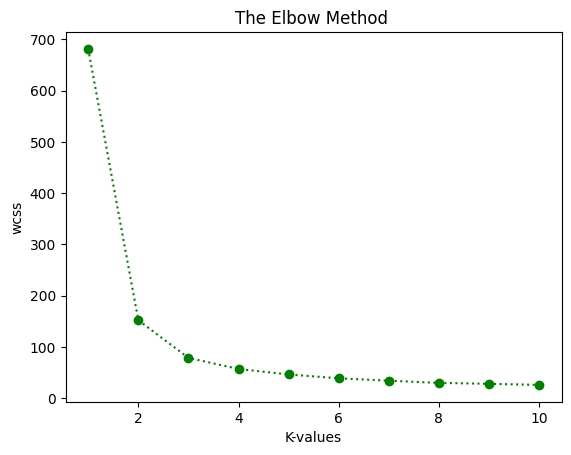

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.76
0.24
0.7017242160053677
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.00      0.00      0.00        50
           2       0.72      0.95      0.82        38

    accuracy                           0.24       150
   macro avg       0.24      0.32      0.27       150
weighted avg       0.18      0.24      0.21       150

0.03333333333333333
0.9666666666666667
0.9024691358024692
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.90      1.00      0.95        45
           2       1.00      0.91      0.95        55

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



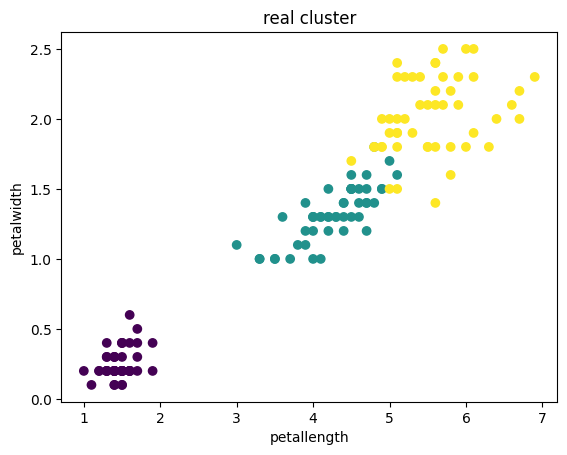

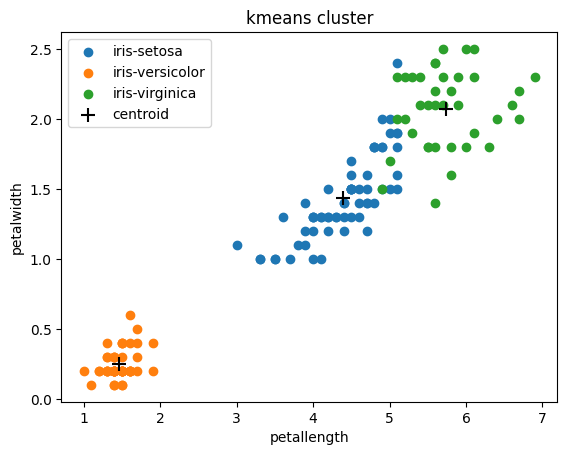

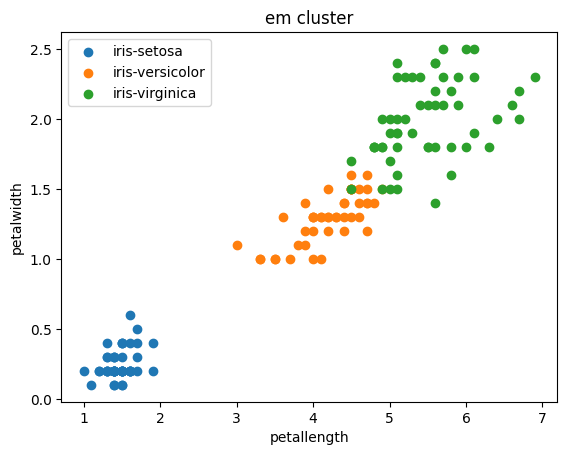

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score,classification_report,roc_curve,silhouette_score



iris_data = datasets.load_iris()

df = pd.DataFrame(
    iris_data.data,
    columns=iris_data.feature_names
    )

df

df['target'] = iris_data.target

# Map targets to target names
target_names = {
    0:'setosa',
    1:'versicolor',
    2:'virginica'
}

df['target_names'] = df['target'].map(target_names)
df.head()

x = df.iloc[:, :4].values
y = df.iloc[:, 4].values

from sklearn.cluster import KMeans
k= []
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, n_init = 10, random_state = 0)
    kmeans.fit(x)
    k.append(i)
    wcss.append(kmeans.inertia_)

plt.plot(k, wcss, 'go:')
plt.xlabel('K-values')
plt.ylabel('wcss')
plt.title('The Elbow Method ')
plt.show()

data=datasets.load_iris()
x=data.data
y=data.target

scaler=StandardScaler()
scaled=scaler.fit_transform(x)
xs=pd.DataFrame(scaled)

kmeans=KMeans(n_clusters=3,random_state=0)
km=kmeans.fit_predict(x)

e1=np.mean(km!=y)
print(e1)
a1=np.mean(km==y)
print(a1)
print(silhouette_score((pd.DataFrame(y)),km))
print(classification_report(km,y))

emm=GaussianMixture(n_components=3,random_state=0)
em=emm.fit_predict(xs)

e1=np.mean(em!=y)
print(e1)
a1=np.mean(em==y)
print(a1)
print(silhouette_score((pd.DataFrame(y)),em))
print(classification_report(em,y))

plt.scatter(x[:,2],x[:,3],c=y)
plt.xlabel('petallength')
plt.ylabel('petalwidth')
plt.title('real cluster')
plt.show()

plt.scatter(x[km==0,2],x[km==0,3],label='iris-setosa')
plt.scatter(x[km==1,2],x[km==1,3],label='iris-versicolor')
plt.scatter(x[km==2,2],x[km==2,3],label='iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s=100,marker='+',color = 'black',label='centroid')
plt.legend()
plt.xlabel('petallength')
plt.ylabel('petalwidth')
plt.title('kmeans cluster')
plt.show()

plt.scatter(x[em==0,2],x[em==0,3],label='iris-setosa')
plt.scatter(x[em==1,2],x[em==1,3],label='iris-versicolor')
plt.scatter(x[em==2,2],x[em==2,3],label='iris-virginica')
plt.legend()
plt.xlabel('petallength')
plt.ylabel('petalwidth')
plt.title('em cluster')
plt.show()